# Divergenza KL e ELPD {#saec-kl}

**Prerequisiti**

**Concetti e competenze chiave**

- Comprendere in modo dettagliato il concetto di Expected Log Predictive Density (ELPD), apprezzandone l'importanza e l'applicabilità nel contesto della valutazione predittiva dei modelli statistici.
- Esplorare e analizzare la relazione tra il concetto di entropia e la ELPD, identificando come l'entropia possa influenzare o riflettere la capacità predittiva di un modello attraverso la densità logaritmica predittiva prevista.

**Preparazione del Notebook**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import scipy.stats as stats
from scipy.optimize import minimize
import arviz as az

In [23]:
seed: int = sum(map(ord, "kl"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

In questo capitolo, esamineremo in dettaglio due concetti fondamentali per la valutazione e il confronto di modelli statistici nel contesto bayesiano: la Divergenza di Kullback-Leibler ($\mathbb{KL}$) e la Densità Predittiva Logaritmica Attesa (Expected Log Predictive Density, ELPD). Questi strumenti ci permettono di quantificare l'adattamento dei modelli ai dati e la loro capacità predittiva.

## Confronto di Modelli Utilizzando la Divergenza $\mathbb{KL}$

### La Distribuzione Predittiva Posteriori

La distribuzione predittiva posteriori, indicata come $Q(\tilde{y} \mid y)$, rappresenta le previsioni su nuovi dati $\tilde{y}$ basate su un modello statistico $Q$ e i dati osservati $y$. Questa distribuzione combina:

1. Le previsioni del modello per un dato set di parametri $\theta$, ovvero $Q(\tilde{y} \mid \theta)$.
2. La distribuzione posteriore di questi parametri dati i dati osservati, cioè $P(\theta \mid y)$.

Questa combinazione permette di fare previsioni che tengono conto sia dell'incertezza nei parametri che della struttura del modello.

### Misurazione della Divergenza $\mathbb{KL}$

La divergenza $\mathbb{KL}$ quantifica quanto bene la distribuzione predittiva del modello $Q$ si avvicina alla distribuzione vera $P$ che ha generato i dati. Matematicamente, questo è espresso come $\mathbb{KL}(P \parallel Q)$. 

Interpretazione:

- Un valore basso di $\mathbb{KL}$ indica che $Q$ è una buona approssimazione di $P$.
- Un valore alto indica una maggiore discrepanza tra le due distribuzioni.

### Confronto Pratico tra Modelli

Poiché non conosciamo direttamente $P$, la vera distribuzione che ha generato i dati, utilizziamo la divergenza $\mathbb{KL}$ per confrontare diversi modelli. La formula generale per la divergenza $\mathbb{KL}$ tra due distribuzioni $P$ e $Q$ è:

$$
\mathbb{KL}(P \parallel Q) = \mathbb{E}_P[\log P] - \mathbb{E}_P[\log Q],
$$

dove $\mathbb{E}_P$ indica il valore atteso calcolato sotto la distribuzione $P$.

Per distribuzioni discrete, questa si esprime come:

$$
\mathbb{KL}(P \parallel Q) = \sum_{i=1}^n p_i (\log p_i - \log q_i),
$$

dove $p_i$ e $q_i$ rappresentano le probabilità degli eventi $i$ per le distribuzioni $P$ e $Q$ rispettivamente.

La divergenza $\mathbb{KL}$ può essere riformulata in termini di valore atteso come segue:

- Termine $\log P$:
  $$
  \mathbb{E}_P[\log P(X)] = \sum_{i=1}^n p_i \log p_i
  $$
  Questo termine rappresenta l'entropia negativa di $P$.

- Termine $\log Q$:
  $$
  \mathbb{E}_P[\log Q(X)] = \sum_{i=1}^n p_i \log q_i
  $$
  Questo termine rappresenta l'entropia incrociata tra $P$ e $Q$.

Quindi, la divergenza $\mathbb{KL}$ si riduce a:

$$
\mathbb{KL}(P \parallel Q) = \mathbb{E}_P[\log P(X)] - \mathbb{E}_P[\log Q(X)]
$$

Per variabili continue, la formula diventa:

$$
\mathbb{KL}(P \parallel Q) = \int p(x) (\log p(x) - \log q(x)) \, dx.
$$

Nella pratica del confronto tra modelli, il termine $\mathbb{E}_P[\log P]$ rimane costante per tutti i modelli confrontati e può quindi essere omesso. Ci concentriamo dunque sul termine:

$$
-\mathbb{E}_P[\log Q(y)]
$$

che misura l'adattabilità del modello ai dati osservati. Questo si calcola come:

$$
-\int p(y) \log Q(y) \, dy,
$$

indicando quale modello $Q$ rappresenti meglio la distribuzione $P$ secondo la quantità di informazione che si perderebbe utilizzandolo per descrivere i dati osservati.

## Expected Log Predictive Density (ELPD)

L'ELPD è una misura avanzata usata nei metodi bayesiani per valutare quanto bene un modello può prevedere nuovi dati. È come se stessimo chiedendo al modello: "Quanto sei sicuro delle tue previsioni per dati che non hai mai visto?"

La formula dell'ELPD è:

$$ \text{ELPD} = \sum_{i=1}^n \log p(y_i | \mathbf{y}_{-i}), $$

dove:

- $y_i$ è l'i-esima osservazione,
- $\mathbf{y}_{-i}$ rappresenta tutte le osservazioni eccetto $y_i$.

Interpretazione:

- L'ELPD misura quanto bene il modello può prevedere ogni singola osservazione basandosi su tutte le altre. 
- Un ELPD più alto indica un modello con migliori capacità predittive.

### Collegamento con la Divergenza $\mathbb{KL}$

Il collegamento tra $-\mathbb{E}_P[\log Q(y)]$ e l'ELPD è che entrambi misurano la capacità predittiva di un modello, ma in modi leggermente diversi:

1. $-\mathbb{E}_P[\log Q(y)]$ misura la divergenza tra la vera distribuzione $P$ e la distribuzione del modello $Q$, indicando quanto bene $Q$ approssima $P$.
2. L'ELPD, d'altra parte, misura direttamente la capacità del modello di prevedere nuove osservazioni, utilizzando un approccio di convalida incrociata leave-one-out.

L'ELPD si focalizza sulla capacità di un modello di predire nuovi dati, offrendo una misura della sua capacità di generalizzazione. Matematicamente, l'ELPD è definito come il valore atteso del logaritmo della densità predittiva di un modello, calcolato sotto la vera distribuzione dei dati futuri:

$$
\text{ELPD} = \mathbb{E}_{y \sim p(y)} [\log p(y \mid \theta)]
$$

Mentre $-\int p(y) \log Q(y) \, dy$ quantifica quanto bene un modello descrive la distribuzione attuale dei dati, l'ELPD stima quanto efficacemente il modello può essere utilizzato per prevedere nuovi dati. Questo rende l'ELPD una misura complementare alla $\mathbb{KL}$, enfatizzando non solo l'adattabilità ma anche la predittività di un modello.

In conclusione, utilizzare l'ELPD come criterio di valutazione tende a favorire modelli che non solo si adattano bene ai dati esistenti ma sono anche robusti contro l'overfitting. La combinazione di Divergenza $\mathbb{KL}$ ed ELPD fornisce una valutazione completa dei modelli, considerando sia la loro capacità di adattarsi ai dati osservati che la loro abilità nel fare previsioni accurate su nuovi dati.

::: {#exm-}
Consideriamo un esempio utilizzando la distribuzione binomiale per illustrare il concetto di ELPD. Immaginiamo un esperimento in cui lanciamo una moneta 10 volte e contiamo il numero di teste. Supponiamo che la vera probabilità di ottenere testa sia 0.6 (anche se nella realtà non la conosceremmo).

1) La vera distribuzione dei dati segue una Binomiale(n=10, p=0.6):
   $y \sim \text{Binomiale}(10, 0.6)$
2) Il nostro modello stima $p=0.5$ (ipotizziamo una moneta equa):
   $p(y|\theta) = \text{Binomiale}(10, 0.5)$

Calcoliamo l'ELPD:

In [14]:
# Parametri
n = 10  # numero di lanci
p_true = 0.6  # vera probabilità di testa
p_model = 0.5  # probabilità stimata dal modello

# Calcolo ELPD
elpd = 0
for y in range(n + 1):
    # Probabilità di y secondo la vera distribuzione
    p_true_y = binom.pmf(y, n, p_true)

    # Log della densità predittiva del modello
    log_p_model_y = binom.logpmf(y, n, p_model)

    # Somma pesata
    elpd += p_true_y * log_p_model_y

print(f"ELPD del modello che stima p=0.5: {elpd:.4f}")

# Per confronto, calcoliamo l'ELPD per il modello "vero"
elpd_true = 0
for y in range(n + 1):
    p_true_y = binom.pmf(y, n, p_true)
    log_p_true_y = binom.logpmf(y, n, p_true)
    elpd_true += p_true_y * log_p_true_y

print(f"ELPD del modello vero (con p=0.6): {elpd_true:.4f}")

ELPD del modello che stima p=0.5: -2.0549
ELPD del modello vero (con p=0.6): -1.8536


L'ELPD del modello vero è maggiore (meno negativo) di quello del nostro modello stimato, indicando una migliore capacità predittiva.

Questo esempio illustra come l'ELPD quantifica la capacità predittiva di un modello:

1. Considera tutti i possibili risultati (da 0 a 10 teste).
2. Per ogni risultato, calcola:
   - La probabilità di quel risultato secondo la vera distribuzione.
   - Il logaritmo della densità predittiva del nostro modello per quel risultato.
3. Moltiplica questi due valori e somma su tutti i possibili risultati.

In conclusione, l'ELPD ci permette di confrontare modelli diversi: un valore più alto (meno negativo) indica una migliore capacità predittiva. Nel nostro caso, il vero modello (p=0.6) ha un ELPD maggiore del modello stimato (p=0.5).
:::

## Metodi di Approssimazione per la Stima dell'ELPD

L'ELPD è un importante indicatore della qualità di un modello statistico. Tuttavia, poiché la vera distribuzione dei dati è sconosciuta, non possiamo calcolare direttamente l'ELPD. Per superare questa limitazione, utilizziamo metodi di approssimazione noti come "criteri di informazione".

### Obiettivo dei Criteri di Informazione

I criteri di informazione ci aiutano a bilanciare due aspetti cruciali nella valutazione di un modello:

1. L'adattamento del modello ai dati osservati
2. La complessità del modello

Esaminiamo alcuni dei criteri più comuni utilizzati per approssimare l'ELPD.

### Errore Quadratico Medio (MSE)

L'Errore Quadratico Medio (Mean Squared Error o MSE) misura la discrepanza media tra le previsioni del modello e i valori reali.

**Formula:**

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2, $$

dove:

- $n$ è il numero totale di osservazioni,
- $y_i$ sono i valori reali,
- $\hat{y}_i$ sono i valori previsti dal modello.

Un MSE inferiore indica un migliore adattamento del modello ai dati.

### Criterio di Informazione di Akaike (AIC)

Il Criterio di Informazione di Akaike (AIC) va oltre l'MSE, considerando sia l'adattamento del modello che la sua complessità.

**Formula:**

$$ AIC = -2 \sum \log p(y_i \mid \hat{\theta}_{\text{mle}}) + 2k, $$

dove:

- $\hat{\theta}_{\text{mle}}$ sono i parametri stimati del modello,
- $k$ è il numero di parametri del modello.

L'AIC bilancia la bontà di adattamento (primo termine) con la complessità del modello (secondo termine). Un valore più basso di AIC indica una minor perdita di informazione, suggerendo un modello preferibile.

**Vantaggi e Limitazioni:**

- Facile e veloce da calcolare.
- Può essere meno accurato per campioni piccoli o modelli complessi.
- Fornisce un'approssimazione asintoticamente corretta dell'ELPD per modelli regolari e campioni grandi.

### Criterio di Informazione Bayesiano (BIC)

Il Criterio di Informazione Bayesiano (BIC) è definito come:

$$
BIC = \ln(n)k - 2\ln(L),
$$

dove $n$ è il numero di osservazioni. 
  
Il BIC impone una penalità maggiore per l'incremento dei parametri, rendendolo particolarmente adeguato per dataset di grandi dimensioni.

### Widely Applicable Information Criterion (WAIC)

Il WAIC è una versione avanzata dell'AIC, particolarmente utile nel contesto bayesiano. Considera l'intera distribuzione a posteriori dei parametri anziché solo la stima puntuale.

**Formula:**

$$ WAIC = -2\left[ \sum_{i=1}^{n} \log \left( \frac{1}{S} \sum_{s=1}^{S} p(y_i|\theta^{(s)}) \right) - \sum_{i=1}^{n} \text{Var}_{\theta^{(s)}} \left( \log p(y_i|\theta^{(s)}) \right) \right], $$

dove:

- $S$ è il numero di campioni dalla distribuzione a posteriori,
- $\text{Var}_{\theta^{(s)}}$ è la varianza della log-verosimiglianza.

**Caratteristiche del WAIC:**

1. Calcola il logaritmo della densità predittiva per ogni punto dati.
2. Penalizza la complessità del modello basandosi sulla variabilità delle sue predizioni.
3. La somma delle varianze a posteriori del logaritmo della densità predittiva converge al numero effettivo di parametri del modello.


### Leave-One-Out Cross-Validation (LOO-CV)

Il LOO-CV è un metodo robusto che massimizza l'utilizzo dei dati disponibili, rendendolo ideale per modelli complessi e campioni di dimensioni ridotte.

**Procedura:**

1. Rimuove un'osservazione alla volta.
2. Adatta il modello sui dati rimanenti.
3. Valuta la densità predittiva per l'osservazione esclusa.

**Formula:**

$$ \text{Stima dell'ELPD} = \sum_{i=1}^N \log p(y_i \mid y_{-i}), $$

dove:

- $y_i$ è il dato escluso,
- $y_{-i}$ rappresenta tutti gli altri dati.

**Vantaggi e Limitazioni:**

- Fornisce una stima robusta dell'ELPD.
- Particolarmente utile per set di dati non molto ampi.
- Computazionalmente intensivo.

### Valutazione Comparativa e Applicazioni Pratiche

Questi metodi forniscono diverse prospettive sulla stima dell'ELPD. Il LOO-CV è particolarmente prezioso per modelli complessi o set di dati limitati, mentre AIC e WAIC offrono approcci più rapidi e meno computazionalmente intensivi, adatti per valutazioni preliminari o quando si dispone di grandi set di dati.

In conclusione, la selezione del modello ottimale richiede un equilibrio tra adattamento ai dati e semplicità. L'utilizzo combinato di tecniche di validazione incrociata e criteri di informazione permette di costruire modelli che:

1. si adattano bene ai dati attuali,
2. sono in grado di fare previsioni affidabili su nuovi dati,
3. catturano le tendenze importanti senza perdersi nel rumore.

L'obiettivo finale non è creare il modello più complesso o quello che si adatta perfettamente ai dati di addestramento, ma trovare un equilibrio ottimale tra semplicità e accuratezza.

::: {#exm-}
Il seguente script Python dimostra come calcolare l'AIC per un modello binomiale. Ecco una breve spiegazione del codice:

- Definiamo una funzione per la log-verosimiglianza negativa del modello binomiale.
- Implementiamo una funzione per calcolare l'AIC dato il valore di log-verosimiglianza e il numero di parametri.
- Utilizziamo scipy.optimize.minimize per trovare il parametro che massimizza la verosimiglianza.
- Calcoliamo l'AIC per il modello binomiale.

In [19]:
# Dati di esempio 
n_trials = 100
true_p = 0.7
data = np.random.binomial(n_trials, true_p, size=50)

# Funzione di log-verosimiglianza negativa
def neg_log_likelihood(p, data, n):
    return -np.sum(binom.logpmf(data, n, p))

# Funzione per calcolare l'AIC
def calculate_aic(log_likelihood, k):
    return 2 * k - 2 * log_likelihood

# Ottimizzazione per trovare la massima verosimiglianza
result = minimize(
    neg_log_likelihood,
    x0=[0.5],
    args=(data, n_trials),
    method="L-BFGS-B",
    bounds=[(0, 1)],
)

# Estrai il parametro ottimale e la log-verosimiglianza
p_mle = result.x[0]
max_log_likelihood = -result.fun

# Calcola l'AIC
k = 1  # numero di parametri (solo p in questo caso)
aic = calculate_aic(max_log_likelihood, k)

print(f"Parametro stimato (p): {p_mle:.4f}")
print(f"Log-verosimiglianza massimizzata: {max_log_likelihood:.4f}")
print(f"AIC: {aic:.4f}")

Parametro stimato (p): 0.5000
Log-verosimiglianza massimizzata: -567.8227
AIC: 1137.6453


Questo esempio mostra come calcolare l'AIC. Questo indice può essere utilizzato per confrontare modelli con diversi livelli di complessità. Il modello con l'AIC più basso è generalmente considerato il migliore in termini di compromesso tra adattamento ai dati e complessità del modello.
:::

## Considerazioni Conclusive

L'ELPD e la divergenza $\mathbb{KL}$ sono strumenti complementari per la valutazione dei modelli statistici:

1. ELPD: Misura la capacità predittiva su nuovi dati. Più alto è l'ELPD, migliori sono le previsioni.
2. Divergenza $\mathbb{KL}$: Quantifica la differenza tra la distribuzione vera dei dati e quella del modello. Una divergenza KL minore indica una migliore approssimazione.

Relazione tra ELPD e divergenza $\mathbb{KL}$:

- Un alto ELPD generalmente corrisponde a una bassa divergenza $\mathbb{KL}$.
- Massimizzare l'ELPD equivale a minimizzare la divergenza $\mathbb{KL}$.
- Entrambi guidano verso modelli che catturano meglio la realtà dei dati.

Nella pratica:

- La divergenza $\mathbb{KL}$ valuta l'adattamento ai dati osservati.
- L'ELPD e i suoi metodi di approssimazione (LOO-CV, AIC, WAIC) misurano la capacità di generalizzazione a dati futuri.

In conclusione, l'ELPD, la divergenza $\mathbb{KL}$ e i relativi metodi di approssimazione forniscono un framework essenziale per la valutazione e la selezione di modelli statistici, bilanciando efficacemente l'adattamento ai dati con la capacità predittiva su nuove osservazioni.

::: {#exm-}
Consideriamo un esempio numerico per confrontare AIC con la divergenza $\mathbb{KL}$. Supponiamo di avere un set di dati e due modelli statistici: il primo modello si adatta bene ai dati (modello vero), mentre il secondo è un po' più distante dalla realtà (modello alternativo, ne considereremo 5). Calcoleremo la divergenza $\mathbb{KL}$ tra le distribuzioni previste da questi modelli e il Criterio di Informazione di Akaike per valutare la qualità di adattamento dei modelli. 

Per questo esempio, supponiamo di avere un set di dati e due modelli statistici: il primo modello si adatta bene ai dati (modello vero), mentre il secondo è un po' più distante dalla realtà (modello alternativo). Calcoleremo la divergenza $\mathbb{KL}$ tra le distribuzioni previste da questi modelli e il Criterio di Informazione di Akaike per valutare la qualità di adattamento dei modelli.

- Supponiamo che i dati siano generati da una distribuzione normale con media vera $\mu = 0$ e deviazione standard $\sigma = 1$.
- Assumiamo che il modello vero conosca i parametri della distribuzione.
- Assumiamo che questo modello abbia una deviazione standard leggermente diversa (considereremo 5 modelli diversi: $\sigma$ = 1.5 fino a 5.0).

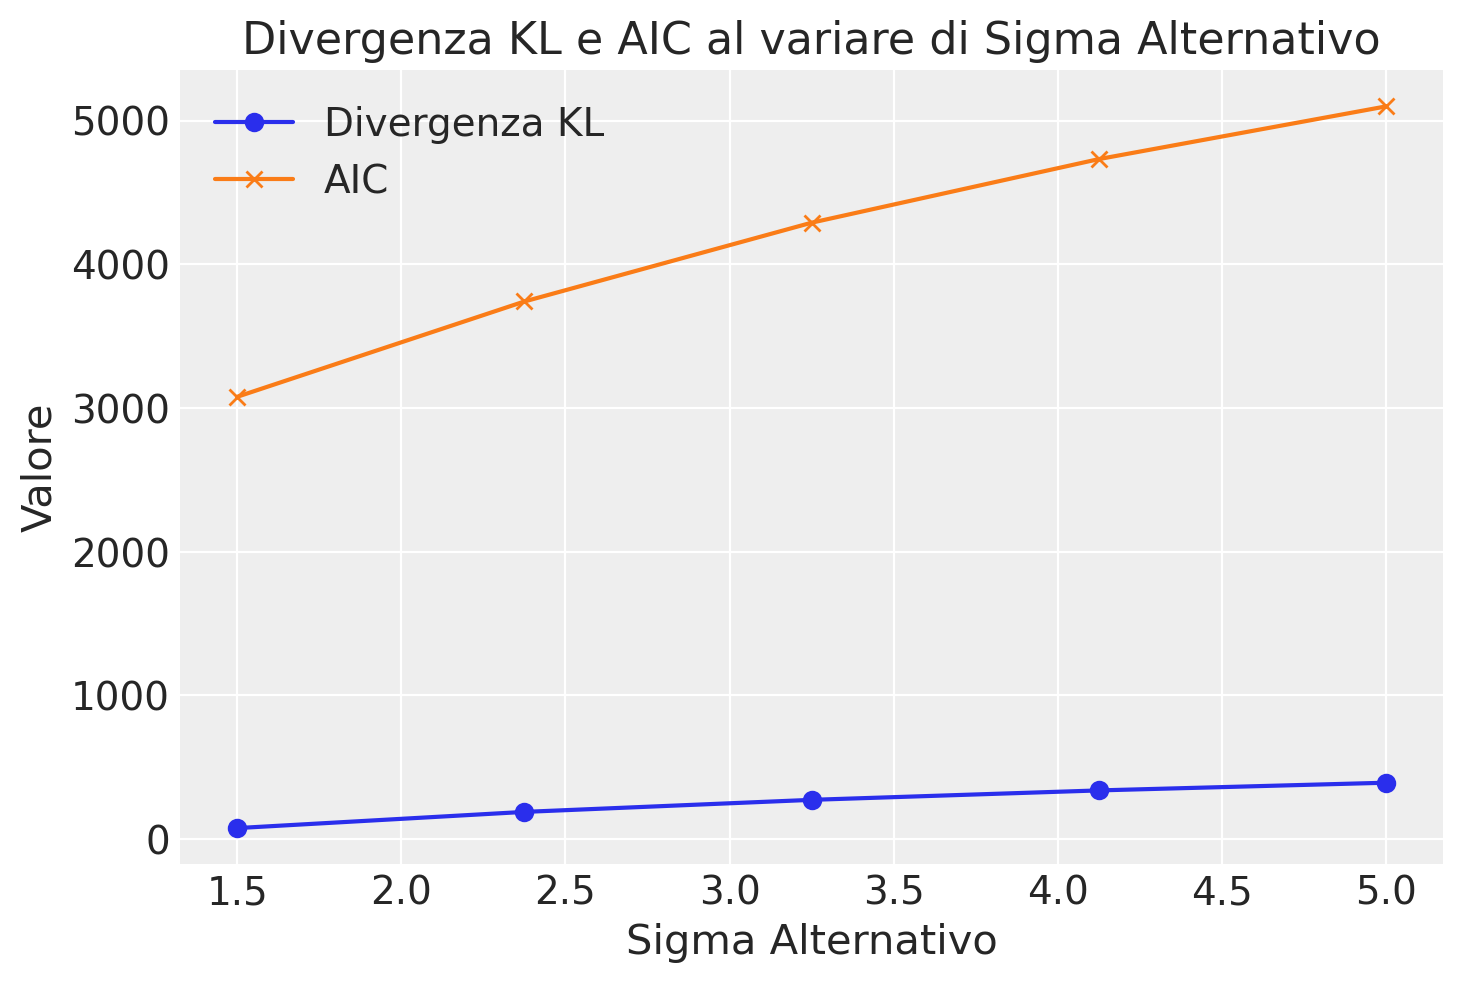

In [24]:
# Generazione dei dati simulati
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=1000)

# Parametri del modello vero
mu_true, sigma_true = 0, 1

# Variazione di sigma_alt
sigma_alts = np.linspace(1.5, 5.0, 5)
KL_divergences = []
AIC_values = []

# Calcolo della divergenza KL e AIC per ogni sigma_alt
for sigma_alt in sigma_alts:
    p_true = stats.norm.pdf(data, mu_true, sigma_true)
    p_alt = stats.norm.pdf(data, mu_true, sigma_alt)
    KL_divergence = np.sum(p_true * np.log(p_true / p_alt))
    KL_divergences.append(KL_divergence)

    log_likelihood_alt = np.sum(np.log(stats.norm.pdf(data, mu_true, sigma_alt)))
    AIC_alt = (
        2 * 2 - 2 * log_likelihood_alt
    )  # 2 parametri (mu e sigma), nessuna esponenziale
    AIC_values.append(AIC_alt)

# Creazione del grafico
plt.plot(sigma_alts, KL_divergences, label="Divergenza KL", marker="o")
plt.plot(sigma_alts, AIC_values, label="AIC", marker="x")
plt.xlabel("Sigma Alternativo")
plt.ylabel("Valore")
plt.title("Divergenza KL e AIC al variare di Sigma Alternativo")
plt.legend()
plt.show()

Si vede che, anche se la scala di misura è diversa tra la divergenza $\mathbb{KL}$ e il criterio AIC, all'aumentare della differenza tra la distribuzione vera $P$ e la distribuzione alternativa $Q$, entrambi aumentano.
:::

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [25]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Fri Jul 26 2024

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

arviz     : 0.18.0
matplotlib: 3.9.1
numpy     : 1.26.4
scipy     : 1.14.0

Watermark: 2.4.3

